In [1]:
%load_ext autoreload
%autoreload

from pyxpcs.reader import IMMReader8ID
from pyxpcs.structs import PyXPCSArray
from pyxpcs.config import PyXPCSDict
from pyxpcs.utils import config_from_8idhdf5
from pyxpcs.viz import plot_pix_sum
from pyxpcs.algorithms import multitau

from pprint import pprint

In [2]:
IMM_FILE = "/home/faisal/Development/xpcs-eigen/data/pyxpcs/A002_MJ_PMA_47g61kDa_att2_160C_Lq0_001_00001-00512.imm"

HDF5_FILE = "/home/faisal/Development/xpcs-eigen/data/pyxpcs/A002_MJ_PMA_47g61kDa_att2_160C_Lq0_001_0002-0512.hdf"


In [3]:
reader = IMMReader8ID(IMM_FILE)
reader.load()


In [4]:
config = config_from_8idhdf5(HDF5_FILE)
pprint(config)

<KeysViewHDF5 ['Version', 'analysis_type', 'avg_frames', 'avg_frames_burst', 'batches', 'blemish_enabled', 'compression', 'dark_begin', 'dark_begin_todo', 'dark_end', 'dark_end_todo', 'data_begin', 'data_begin_todo', 'data_end', 'data_end_todo', 'delays_per_level', 'delays_per_level_burst', 'dnophi', 'dnoq', 'dphilist', 'dphispan', 'dqlist', 'dqmap', 'dqspan', 'dynamic_mean_window_size', 'flatfield_enabled', 'input_file_local', 'input_file_remote', 'kinetics', 'lld', 'mask', 'normalization_method', 'normalize_by_framesum', 'normalize_by_smoothed_img', 'num_g2partials', 'output_data', 'output_file_local', 'output_file_remote', 'qmap_hdf5_filename', 'qphi_bin_to_process', 'sigma', 'smoothing_method', 'snophi', 'snoq', 'specfile', 'specscan_dark_number', 'specscan_data_number', 'sphilist', 'sphispan', 'sqlist', 'sqmap', 'sqspan', 'static_mean_window_size', 'stride_frames', 'stride_frames_burst', 'swbinX', 'swbinY', 'twotime2onetime_window_size']>
PyXPCSDict({'rows': 1556, 'cols': 516, 'fr

In [5]:

data = reader.array
pixel_sum = data.sum(axis=1)
pixel_sum.shape


(516, 1556)

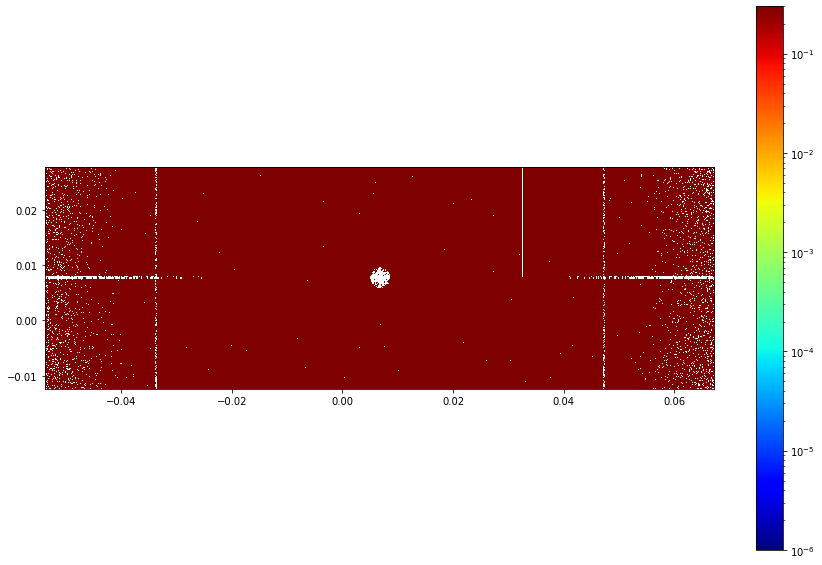

In [6]:
plot_pix_sum(pixel_sum, config)

In [20]:
pixel_sum

array([[4., 1., 0., ..., 3., 2., 1.],
       [0., 2., 1., ..., 3., 0., 0.],
       [1., 2., 0., ..., 1., 1., 2.],
       ...,
       [0., 0., 1., ..., 2., 0., 0.],
       [2., 1., 2., ..., 0., 0., 2.],
       [1., 1., 1., ..., 2., 3., 1.]])

In [7]:
frames, indices, values = data.get_lil()

In [8]:
multitau(data)

AttributeError: 'list' object has no attribute 'frames'

In [9]:
frames

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
indices[0][0:30]

array([106, 275, 338, 444, 452, 462, 463, 490, 511, 526, 528, 546, 554,
       556, 558, 559, 567, 572, 577, 584, 588, 592, 593, 596, 597, 598,
       601, 610, 615, 626], dtype=uint32)

In [11]:
values

[array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 2, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 2, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=uint16),
 array([1, 1,